In [1]:
from datasets import load_dataset

# Load the IMDB dataset
imdb = load_dataset("imdb")
train_texts = imdb["train"]["text"]
train_labels = imdb["train"]["label"]
test_texts = imdb["test"]["text"]
test_labels = imdb["test"]["label"]

/Users/arthurchieppe/Documents/10o-semestre/nlp/final-project/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import spacy
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Load SpaCy model
nlp = spacy.load("en_core_web_md")

# Function to get document vectors using SpaCy
def get_vectors(texts):
    vectors = []
    for doc in tqdm(nlp.pipe(texts, batch_size=50), total=len(texts)):
        vectors.append(doc.vector)
    return np.array(vectors)

# Convert texts to vectors
train_vectors = get_vectors(train_texts)
test_vectors = get_vectors(test_texts)

# Convert data to tensors
train_vectors_tensor = torch.tensor(train_vectors, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
test_vectors_tensor = torch.tensor(test_vectors, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = train_vectors.shape[1]
model = SentimentClassifier(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_vectors_tensor)
    loss = criterion(outputs, train_labels_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Evaluate model
model.eval()
with torch.no_grad():
    predictions = model(test_vectors_tensor).numpy()
    predictions = (predictions > 0.5).astype(int)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

accuracy = accuracy_score(test_labels_tensor, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels_tensor, predictions, average="binary")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(test_labels_tensor, predictions)
plt.show()

# Save the model
torch.save(model.state_dict(), "sentiment_model.pth")

In [6]:
import os
import pickle
# Save preprocessed texts to a pickle file
def save_texts(texts, filename):
    with open(filename, 'wb') as f:
        pickle.dump(texts, f)

train_texts_pkl = 'train_texts.pkl'
test_texts_pkl = 'test_texts.pkl'

save_texts(train_texts, train_texts_pkl)
save_texts(test_texts, test_texts_pkl)

In [8]:
import numpy as np
from tqdm import tqdm

def get_vectors(texts, nlp_model):
    vectors = []
    for doc in tqdm(nlp_model.pipe(texts, batch_size=50), total=len(texts)):
        vectors.append(doc.vector)  # Use document vector (average of word vectors)
    return np.array(vectors)

# Convert texts to vectors
train_vectors = get_vectors(train_texts, nlp)
test_vectors = get_vectors(test_texts, nlp)

  0%|          | 0/25000 [00:00<?, ?it/s]

100%|██████████| 25000/25000 [02:30<00:00, 165.92it/s]


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class SentimentClassifier(nn.Module):
    def __init__(self, input_dim):
        super(SentimentClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model
input_dim = train_vectors.shape[1]
model = SentimentClassifier(input_dim)

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [13]:
# Convert data to tensors
train_vectors_tensor = torch.tensor(train_vectors, dtype=torch.float32)
train_labels_tensor = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
test_vectors_tensor = torch.tensor(test_vectors, dtype=torch.float32)
test_labels_tensor = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

# Training loop
epochs = 10000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(train_vectors_tensor)
    loss = criterion(outputs, train_labels_tensor)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

Epoch 1/10000, Loss: 0.5202910304069519
Epoch 2/10000, Loss: 0.5205086469650269
Epoch 3/10000, Loss: 0.5209898352622986
Epoch 4/10000, Loss: 0.5215579867362976
Epoch 5/10000, Loss: 0.5221147537231445
Epoch 6/10000, Loss: 0.522622287273407
Epoch 7/10000, Loss: 0.522995114326477
Epoch 8/10000, Loss: 0.5232622623443604
Epoch 9/10000, Loss: 0.5232334136962891
Epoch 10/10000, Loss: 0.5228434205055237
Epoch 11/10000, Loss: 0.5221265554428101
Epoch 12/10000, Loss: 0.521220326423645
Epoch 13/10000, Loss: 0.5203861594200134
Epoch 14/10000, Loss: 0.5198190808296204
Epoch 15/10000, Loss: 0.5195972323417664
Epoch 16/10000, Loss: 0.5196711421012878
Epoch 17/10000, Loss: 0.5199590921401978
Epoch 18/10000, Loss: 0.5203811526298523
Epoch 19/10000, Loss: 0.520915687084198
Epoch 20/10000, Loss: 0.5215906500816345
Epoch 21/10000, Loss: 0.522395133972168
Epoch 22/10000, Loss: 0.5232325196266174
Epoch 23/10000, Loss: 0.5239131450653076
Epoch 24/10000, Loss: 0.5240614414215088
Epoch 25/10000, Loss: 0.523629

KeyboardInterrupt: 

In [14]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Evaluate model
model.eval()
with torch.no_grad():
    predictions = model(test_vectors_tensor).numpy()
    predictions = (predictions > 0.5).astype(int)

accuracy = accuracy_score(test_labels_tensor, predictions)
precision, recall, f1, _ = precision_recall_fscore_support(test_labels_tensor, predictions, average="binary")

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.62
Precision: 0.60
Recall: 0.67
F1-Score: 0.64


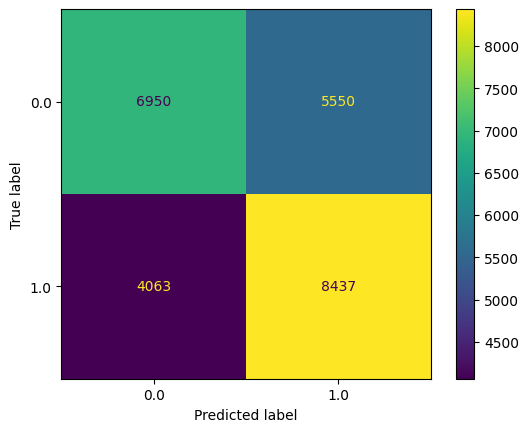

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(test_labels_tensor, predictions)
plt.show()

In [ ]:
torch.save(model.state_dict(), "sentiment_model.pth")